# Individual Planning Report - Chris Gibbons (Group 2)

In [81]:
library(tidyverse)
library(repr)

players_data <- read_csv("https://raw.githubusercontent.com/chrispy-tacos/dsci_idv_planning/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/chrispy-tacos/dsci_idv_planning/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description

In [82]:
players_data |> slice(1:6) #example observations

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


***^Figure 1.1***

In [83]:
summary(players_data)
unique(players_data$experience)
unique(players_data$gender)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

***^Figure 1.2***

The players data consist of 196 observations, with each corresponding to a unique participant in the PLAICraft server. 7 variables are recorded for each participant:

- **experience:** Qualitative character variable classifying the participant's Minecraft experience as one of 5 categories: 'Pro', 'Veteran', 'Amateur', 'Regular', or 'Beginner'.
  
- **subscribe:** Qualitative logical variable indicating whether or not the participant subscribes to a game-related newspaper.

- **hashedEmail:** Qualitative character variable indicating the participant's encrypted email address.

- **played_hours:** Quantitative double variable measuring the hours the participant has spent playing on the PLAICraft server, with a mean value of approximately 5.85 hours.

- **name:** Qualitative character variable indicating the participant's name.

- **gender:** Qualitative character variable classifying the participant's gender as one of 7 categories: 'Male', 'Female', 'Non-binary', 'Prefer not to say', 'Agender', 'Two-Spirited', or 'Other'.

- **Age:** Quantitative double variable indicating the participant's age (in years), with a mean value of 21.14 years.

Further inspection of this data reveals that the "played_hours" variable contains major outliers, which may disproportionately influence the mean. Furthermore, the "experience" and "gender" variables are categorical, and should thus be listed as factor variables.

In [84]:
sessions_data |> slice(1:6) #example observations

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


***^Figure 1.3***

In [85]:
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

***^Figure 1.4***

The sessions data consist of 1535 observations, with each corresponding to an individual play session of a given participant on the PLAICraft server. 5 variables are recorded for each session:

- **hashedEmail:** Qualitative character variable indicating the encrypted email address of the participant whose session it is.
  
- **start_time:** Qualitative character variable describing the date and time the session started.

- **end_time:** Qualitative character variable describing the date and time the session ended.

- **original_start_time:** Quantitative double variable measuring the exact start of the session in UNIX time, with a mean value of 1.719e+12 milliseconds.

- **original_end_time:** Quantitative double variable measuring the exact end of the session in UNIX time, with a mean value of 1.719e+12 milliseconds..

Further inspection of this data reveals that the "start_time" and "end_time" variables record two separate values in each cell: date and time (see *Figure 1.3*). Therefore, the data is untidy.

## Questions of Interest

This project will broadly consider what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter. Specifically, this project will attempt to determine whether a participant's age and count of individual play sessions on PLAICraft can well predict their subscription status to such a newsletter.

To prepare to answer this question using a predictive method, the sessions data can be wrangled to summarize the count of sessions occurring per hashed email address, then combined with the players dataset to contain age and count of sessions as two predictive variables in the same dataset together with the response variable "subscribe". The appropriate predictive model can be trained on the resulting dataset.

## Exploratory Data Analysis + Visualization

In [89]:
#Tidying sessions dataset:
sessions_data_start_tidy <- separate(sessions_data,
                          col = start_time,
                          into = c("start_date", "start_time"),
                          sep = " ")
sessions_data_end_tidy <- separate(sessions_data_start_tidy,
                          col = end_time,
                          into = c("end_date", "end_time"),
                          sep = " ")
sessions_data_tidy <- mutate(sessions_data_end_tidy, start_date = as.Date(start_date), end_date = as.Date(end_date))
sessions_data_tidy |> slice(1:6) #example observations

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30-06-20,18:12,30-06-20,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17-06-20,23:33,17-06-20,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25-07-20,17:34,25-07-20,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25-07-20,03:22,25-07-20,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25-05-20,16:01,25-05-20,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23-06-20,15:08,23-06-20,17:10,1.71916e+12,1.71916e+12


In [70]:
#Obtaining players data means

Mean summary statistics for quantitative variables in players data (see :

| mean played_hours | mean Age |
| --- | --- |
| 5.846 | 21.14 |


WIP

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


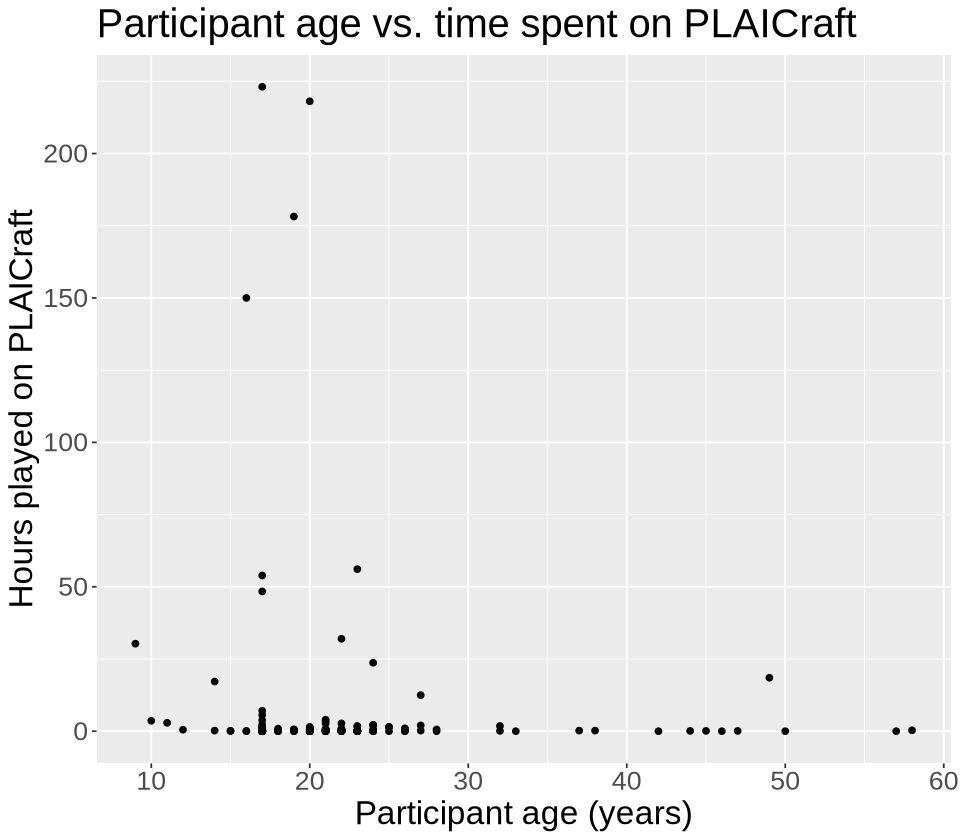

In [77]:
options(repr.plot.width = 8, repr.plot.length = 8)

players_plot <- ggplot(players_data, aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Participant age (years)", y = "Hours played on PLAICraft") +
    ggtitle("Participant age vs. time spent on PLAICraft") +
    theme(text = element_text(size = 20))
players_plot

***^Figure 2.1***

In [90]:
#WIP

***^Figure 2.2***

## Methods and Plan

This project will evaluate the performance of a K-NN classification model for predicting PLAICraft participants' supscription status to a game-related newsletter using player age and count of recorded PLAICraft sessions. This method is appropriate because it involves using two quantitative variables to predict a qualitative variable. Because K-NN classification is not particular about the shape of the data, no assumptions are required to apply this model. One potential weakness of this model is that there is a class imbalance between the number of participants who do and don't subscribe to a game-related newsletter (144 who do vs. 52 who don't, see *Figure 1.2*), which may affect the likelihood of certain predictions by default.

To apply and evaluate the model, the data will be initially split into training and testing sets of proportions 0.70 and 0.30, respectively, stratified by participant subscription status. To select the best model by determining the optimal K parameter, the classifier will be tuned via 5-fold cross-validation using the training data. The K which resulted in the highest accuracy predictions of the validation set will be used in the model specification for predicting the class of the testing data.

## GitHub Repository

Link: https://github.com/chrispy-tacos/dsci_idv_planning.git